In [ ]:
from analysis.data_loader import load_news_data, load_stock_data_from_csv
from analysis.sentiment import add_sentiment_column

In [2]:
# Load news data
news_df = load_news_data("../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")

news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# remove unnamed columns
news_df = news_df.loc[:, ~news_df.columns.str.contains('^Unnamed')]

In [5]:
news_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
# Convert date column to datetime
import pandas as pd
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce', utc=True)

In [9]:
news_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [ ]:
# convert date to date only (remove time)
news_df['date'] = news_df['date'].dt.date

In [14]:
news_df.head()

,headline,url,publisher,date,stock,date_only
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,2020-05-22


In [15]:
# Applying sentiment analysis to news data
news_df = add_sentiment_column(news_df)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   headline   1407328 non-null  object 
 1   url        1407328 non-null  object 
 2   publisher  1407328 non-null  object 
 3   date       1407328 non-null  object 
 4   stock      1407328 non-null  object 
 5   date_only  1407328 non-null  object 
 6   sentiment  1407328 non-null  float64
dtypes: float64(1), object(6)
memory usage: 75.2+ MB


In [17]:
news_df.head()

,headline,url,publisher,date,stock,date_only,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,2020-06-05,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,2020-06-03,0.000
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,2020-05-26,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,2020-05-22,0.000
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,2020-05-22,0.296


# Sentiment Analysis for AAPL

In [ ]:
# load stock data for multiple tickers
aapl_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/AAPL_historical_data.csv")


In [19]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


#### Combine sentiment with stock closing prices on the same date

In [30]:
# filter aaple news
aapl_news_df = news_df[news_df['stock'] == 'AAPL']
aapl_news_df

,headline,url,publisher,date,stock,date_only,sentiment
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,2020-06-10,0.5574
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,2020-06-10,0.0000
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,2020-06-10,0.2023
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,2020-06-10,0.0000
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,2020-06-10,0.3818
...,...,...,...,...,...,...,...
7116,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,2020-03-10,-0.1280
7117,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10,AAPL,2020-03-10,0.0000
7118,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,2020-03-09,-0.9062
7119,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,2020-03-09,0.0000


In [31]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data = aapl_news_df.set_index('date').join(aapl_df['Close'])

In [ ]:
# --- 2. Ensure the news date column is of datetime64[ns] type for robust merging ---
# If 'date_only' is already datetime.date objects, this converts it to datetime64[ns] (midnight)
aapl_news_df['date_for_merge'] = pd.to_datetime(aapl_news_df['date_only'])

In [49]:
# convert aapl_df's index to datetime if it's not already
aapl_df.index = pd.to_datetime(aapl_df.index)

In [50]:
# --- 3. Perform the optimized merge operation ---
# Merge aapl_news_df with aapl_df based on news 'date_for_merge' and stock 'Date' index
combined_dataa = pd.merge(
    aapl_news_df,
    aapl_df[['Close']], # Select only 'Close' from aapl_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (aapl_news_df)
    right_index=True,        # Use the index of the right DataFrame (aapl_df)
    how='left'               # Keep all news entries
)

In [52]:

# --- 4. Optional: Clean up and rename ---
# Drop the temporary column used for merging if no longer needed
combined_data = combined_dataa.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [56]:
combined_data

,headline,url,publisher,date,stock,sentiment,Close
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.5574,88.209999
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.0000,88.209999
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.2023,88.209999
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.0000,88.209999
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.3818,88.209999
...,...,...,...,...,...,...,...
7116,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,-0.1280,71.334999
7117,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10,AAPL,0.0000,71.334999
7118,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,-0.9062,66.542503
7119,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,0.0000,66.542503


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

In [60]:
combined_data.head()

,headline,url,publisher,date,stock,sentiment,Close,Daily Returns
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.5574,88.209999,NaN
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.0000,88.209999,0.0
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.2023,88.209999,0.0
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.0000,88.209999,0.0
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.3818,88.209999,0.0


### Correlation

#### Pearson Correlation

In [61]:
# Pearson correlation
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: 0.06176789033830799


In [62]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.021010968141555217


In [63]:
combined_data['Lagged sentiment'] = combined_data['sentiment'].shift(1)
# Calculate correlation between lagged sentiment and daily returns
correlation = combined_data['Lagged sentiment'].corr(combined_data['Daily Returns'])
print(f"Pearson correlation between lagged sentiment and daily returns: {correlation}")

Pearson correlation between lagged sentiment and daily returns: -0.048094976234130254


##### Summary weak and have positive relationship: sentiment slowly moves the stock price up or down

#### Spearman Correlation

In [64]:
# spearman correlation for sentiment and daily returns
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.010098415263394894


In [65]:
# spearman correlation for sentiment and closing price
correlation = combined_data['sentiment'].corr(combined_data['Close'], method='spearman')
print(f"Spearman correlation between sentiment and closing price: {correlation}")

Spearman correlation between sentiment and closing price: 0.05879656469738324


#### Kendall Correlation

In [66]:
from scipy.stats import kendalltau
# kendall correlation for sentiment and daily returns
correlation = kendalltau(combined_data['sentiment'], combined_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [68]:
correlation = kendalltau(combined_data['sentiment'], combined_data['Close'])
print(f"Kendall correlation between sentiment and closing price: {correlation}")

Kendall correlation between sentiment and closing price: SignificanceResult(statistic=nan, pvalue=nan)


In [72]:
# Drop rows with NaNs before computing
filtered_data = combined_data[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.008836555030171264), pvalue=np.float64(0.8262295038698564))


Interpretation:

- The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.
- The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.0088, pvalue=0.826), indicating a weak positive correlation.

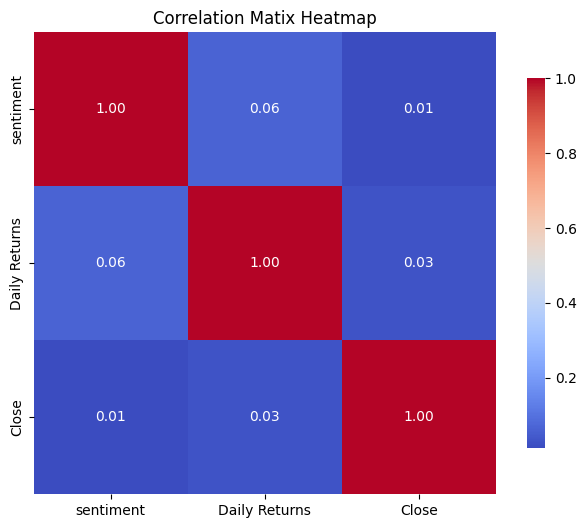

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot correlation heatmap
corr_data = combined_data[['sentiment', 'Daily Returns', 'Close']].dropna()

# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap')
plt.show()

# Sentiment Analysis for AMZN

In [88]:
# Load amzn stock data
amzn_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/AMZN_historical_data.csv")

In [89]:
amzn_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


#### Combine sentiment with closing price on the same day

In [91]:
# filter msft news
amzn_news_df = news_df[news_df['stock'] == 'AMZN']

In [92]:
amzn_news_df.head()

,headline,url,publisher,date,stock,date_only,sentiment
76177,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN,2020-06-10,0.1779
76178,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN,2020-06-10,0.5574
76179,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN,2020-06-10,0.2023
76180,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN,2020-06-10,0.6486
76181,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN,2020-06-10,0.0516


In [94]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data_amzn = amzn_news_df.set_index('date').join(amzn_df['Close'])

In [ ]:
amzn_news_df['date_for_merge'] = pd.to_datetime(amzn_news_df['date_only'])

In [96]:
# convert amzn_df's index to datetime if it's not already
amzn_df.index = pd.to_datetime(amzn_df.index)

In [97]:
combined_data_amzn = pd.merge(
    amzn_news_df,
    amzn_df[['Close']], # Select only 'Close' from amzn_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (amzn_news_df)
    right_index=True,        # Use the index of the right DataFrame (amzn_df)
    how='left'               # Keep all news entries
)

In [98]:
# clean up and rename
combined_data_amzn = combined_data_amzn.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [99]:
combined_data_amzn.head()

,headline,url,publisher,date,stock,sentiment,Close
76177,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN,0.1779,132.372498
76178,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN,0.5574,132.372498
76179,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN,0.2023,132.372498
76180,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN,0.6486,132.372498
76181,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN,0.0516,132.372498


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data_amzn['Daily Returns'] = combined_data_amzn['Close'].pct_change()

## Correlation Analysis

##### Pearson Correlation

In [101]:
# Pearson correlation
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: 0.03469219273354438


In [102]:
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.10583319446836052


Summary: The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.

##### Spearman Correlation

In [103]:
# spearman correlation for sentiment and daily returns
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.02326916223672216


In [104]:
# spearman correlation for sentiment and closing price
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Close'], method='spearman')
print(f"Spearman correlation between sentiment and closing price: {correlation}")

Spearman correlation between sentiment and closing price: 0.12542983269519525


Summary: The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.

##### Kendall Correlation

In [105]:
# kendall correlation for sentiment and daily returns
correlation = kendalltau(combined_data_amzn['sentiment'], combined_data_amzn['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [106]:
correlation = kendalltau(combined_data_amzn['sentiment'], combined_data_amzn['Close'])
print(f"Kendall correlation between sentiment and closing price: {correlation}")

Kendall correlation between sentiment and closing price: SignificanceResult(statistic=nan, pvalue=nan)


In [107]:
# Drop rows with NaNs before computing
filtered_data = combined_data_amzn[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.019540027108955527), pvalue=np.float64(0.6994108779583739))


Interpretation:

- The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.
- The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.01954), pvalue=0.696), indicating a weak positive correlation.

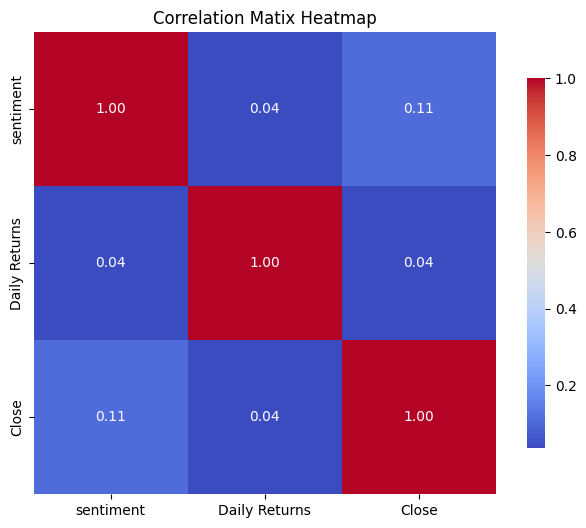

In [108]:
# Plot correlation heatmap
corr_data = combined_data_amzn[['sentiment', 'Daily Returns', 'Close']].dropna()

# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap')
plt.show()